<a href="https://colab.research.google.com/github/aadityasikder/PredictiveModelingForVechicleSale/blob/main/PredictiveModelingForVechicleSale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d syedanwarafridi/vehicle-sales-data

mkdir: cannot create directory ‘/root/.kaggle’: File exists
vehicle-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '/content/vehicle-sales-data.zip'

Archive:  /content/vehicle-sales-data.zip
  inflating: car_prices.csv          


# Exploratory Data Analysis and Feature Engineering

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('car_prices.csv')

In [ ]:
len(df)

558837

In [ ]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.drop(columns=['vin'],axis=1,inplace=True)  # drop vin i.e Vehicle Identification id as it has no effect on car prices


In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   state         558837 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         558088 non-null  object 
 10  interior      558088 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558799 non-null  float64
 13  sellingprice  558825 non-null  float64
 14  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 64.0+ MB


We Can see there are a lot of null values or missing values in some of the columns.

We need to fix the issue of these missing value.

<Axes: >

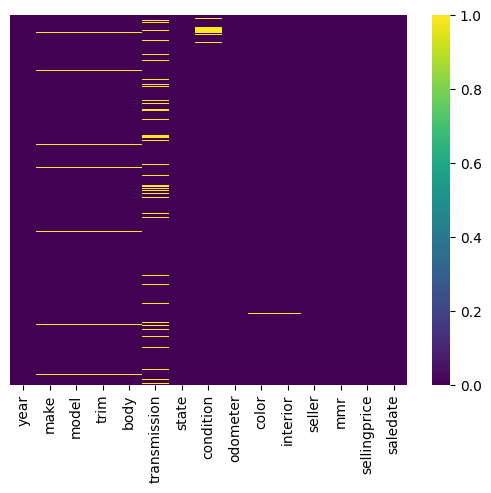

In [ ]:
sns.heatmap(df.isnull(),yticklabels= False,cbar=True,cmap='viridis' )

We can see the transmission column have a significant portion of missing data.

In [ ]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [ ]:
df_new=df.dropna(axis=0,inplace=False) #to drop all the rows with missing values

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   state         472325 non-null  object 
 7   condition     472325 non-null  float64
 8   odometer      472325 non-null  float64
 9   color         472325 non-null  object 
 10  interior      472325 non-null  object 
 11  seller        472325 non-null  object 
 12  mmr           472325 non-null  float64
 13  sellingprice  472325 non-null  float64
 14  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 57.7+ MB


In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
472325/548438

0.8612185880628257

<ipython-input-9-e491379e975d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sellingprice'])


<Axes: xlabel='sellingprice', ylabel='Density'>

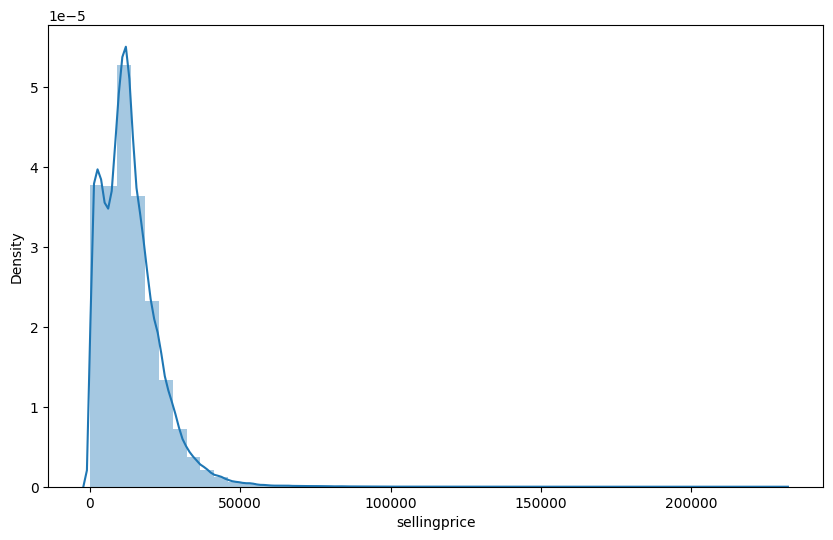

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['sellingprice']) #selling price density plot

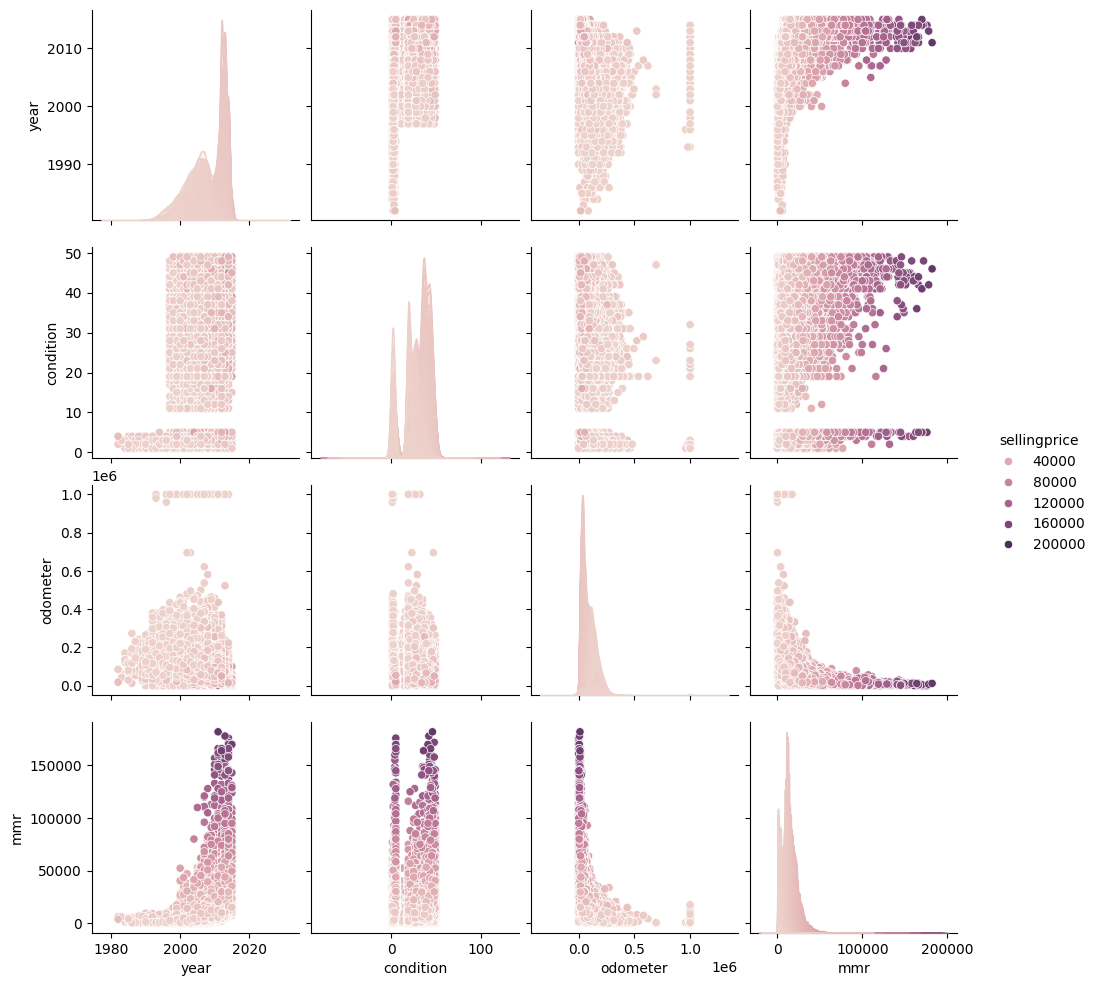

In [ ]:
sns.pairplot(df,hue='sellingprice')

In [ ]:
df.drop(columns=['saledate'],axis=1,inplace=True)

But we can see that all the null values were removed. But after removing it we can see that about 14% of the data of the dataset. So, removing null values from may not be efficient for car price prediction as dataset becomes smaller. Will have to fill up the missing values.

For handling missing values we can use **mode** **and** **mean** for **catagoerical and numerical** colum respectively.

In [ ]:
df['make'].fillna(value=df['make'].mode()[0], inplace=True)
df['model'].fillna(value=df['model'].mode()[0], inplace=True)
df['trim'].fillna(value=df['trim'].mode()[0], inplace=True)
df['body'].fillna(value=df['body'].mode()[0], inplace=True)
df['state'].fillna(value=df['state'].mode()[0], inplace=True)
df['condition'].fillna(value=df['condition'].mean(), inplace=True)
df['color'].fillna(value=df['color'].mode()[0], inplace=True)
df['interior'].fillna(value=df['interior'].mode()[0], inplace=True)
df['mmr'].fillna(value=df['mmr'].mean(), inplace=True)
df['odometer'].fillna(value=df['odometer'].mean(), inplace=True)

df['transmission'].fillna(value=df['transmission'].mode()[0], inplace=True)


In [ ]:
#df.dropna(axis=0,inplace=True)

In [ ]:
#df.day[306447]

In [ ]:
#for i in range(558825)
#df['saledate'][306447][0]+df['saledate'][306447][1]+df['saledate'][306447][2]

In [ ]:
#day=[]
#for i in range(558825):
#  day.append(df['saledate'][i][0]+df['saledate'][i][1]+df['saledate'][i][2])

In [ ]:
df.dropna(subset=['sellingprice'], inplace=True)


#  Encoding

I want to use label encoder for categorical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder=LabelEncoder()

In [ ]:
col=df.columns
col

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice'],
      dtype='object')

In [ ]:
for col in df.columns:
    if df[col].dtype=='O' :
        df[col]=label_encoder.fit_transform(df[col])

In [ ]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,24,658,998,36,1,29,5.0,16639.0,43,1,7201,20500.0,21500.0
1,2015,24,658,998,36,1,29,5.0,9393.0,43,0,7201,20800.0,21500.0
2,2014,3,9,283,37,1,29,45.0,1331.0,33,1,4978,31900.0,30000.0
3,2015,51,596,1399,37,1,29,41.0,14282.0,43,1,13794,27500.0,27750.0
4,2014,3,42,498,37,1,29,43.0,2641.0,33,1,4978,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,24,388,1052,37,1,35,45.0,18255.0,41,1,1536,35300.0,33000.0
558833,2012,41,7,1109,11,1,62,5.0,54393.0,43,1,6466,30200.0,30800.0
558834,2012,3,743,1945,36,1,29,48.0,50561.0,27,1,4978,29800.0,34000.0
558835,2015,36,76,120,78,1,32,38.0,16658.0,43,1,4606,15100.0,11100.0


In [ ]:
#df['make']=label_encoder.fit_transform(df['make'])

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#feature_data = df.drop('transmission',axis=1)
#target_data= df.dropna()['transmission']

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
#rfc=RandomForestClassifier(n_estimators=200)

In [ ]:
#rfc.fit(feature_data,target_data)

RandomForestClassifier(n_estimators=200)

In [ ]:
#missing_transmission_rows = df[df['transmission'].isnull()]

In [ ]:
#features_for_prediction = missing_transmission_rows.drop(columns=['transmission'])

## Develop Model and Evaluation
I am going to use the encoded data to predict the **vehicle selling prices** . As it is a regression problem I am going to use regression models like-
1) **Linear regression**
2) **Decision Tree**
3) **Random Forest**
4) **Neural Network**

we are going to determine which of these models will be best to predict the price with this preprocessed dataset

# Linear regression

In [ ]:
X_LR= df.drop('sellingprice', axis=1)
Y_LR= df['sellingprice']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X_LR, Y_LR, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

Prediction

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
predictions

array([ 2859.1250524 ,  7641.50279832, 23001.39205244, ...,
       12801.54782886,  4545.36827998, 23431.75219232])

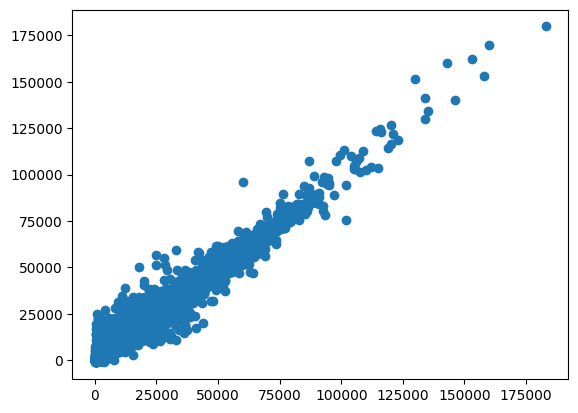

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-31-550730dc5ec8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='sellingprice', ylabel='Density'>

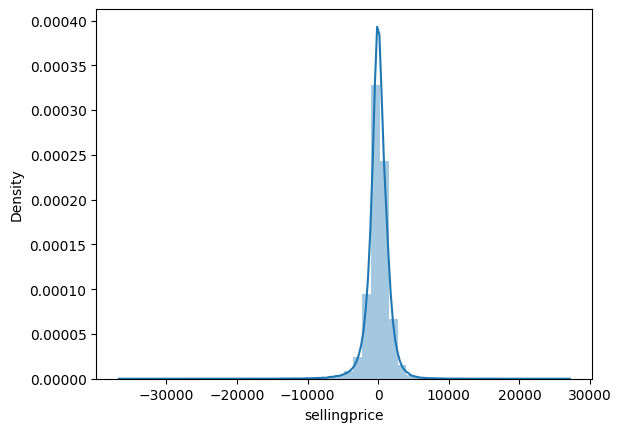

In [ ]:
sns.distplot((y_test-predictions))

The graph shows that the residuals are normally distributed. This normal distribution of residuals supports the validity of the model predictions.

We will use Root Mean Square Error for model evaluation

In [ ]:
from sklearn import metrics

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions)) # RMSE for test set

1637.177160549945

# Decision Tree

In [ ]:
X_DT= df.drop('sellingprice', axis=1)
Y_DT= df['sellingprice']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X_DT, Y_DT, test_size=0.2, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree= DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

predictions and evaluation

In [ ]:
predictions=dtree.predict(X_test)

In [ ]:
predictions

array([ 2300.,  7300., 29000., ..., 11800.,  3400., 24200.])

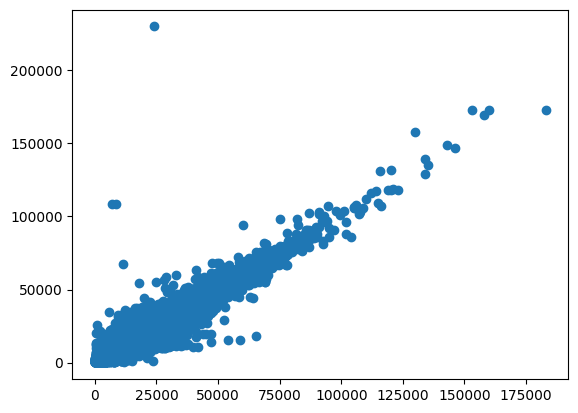

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-42-550730dc5ec8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='sellingprice', ylabel='Density'>

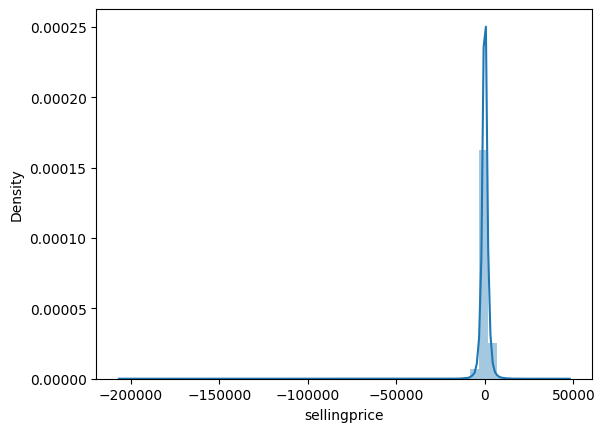

In [ ]:
sns.distplot((y_test-predictions))

This distribution graph shows significant spike around 0.  It may be because large number of residuals very close to zero. I may also suggest there might be overfitting.

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2241.434296449776

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_RF= df.drop('sellingprice', axis=1)
Y_RF= df['sellingprice']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X_RF, Y_RF, test_size=0.2, random_state=10)

In [ ]:
rf=RandomForestRegressor(n_estimators=200)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

predictions and evaluation

In [ ]:
predictions=rf.predict(X_test)

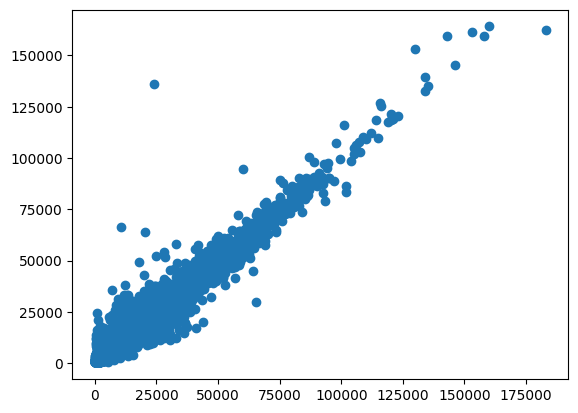

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-53-550730dc5ec8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='sellingprice', ylabel='Density'>

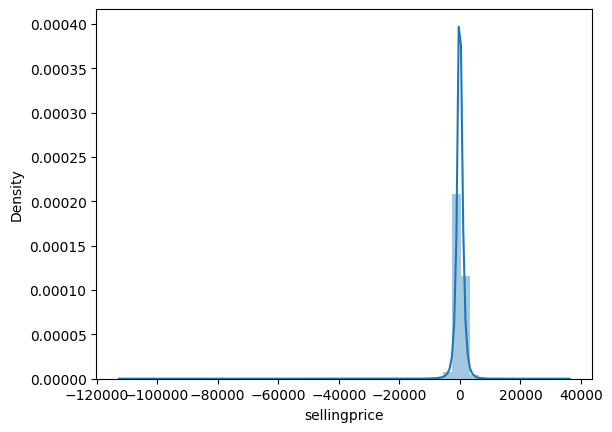

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1526.0717163115226

# Neural Network

In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice'],
      dtype='object')

In [ ]:
convert to arrays

In [ ]:
X=df[['year', 'make', 'model', 'trim', 'body', 'transmission', 'state','condition', 'odometer', 'color', 'interior', 'seller', 'mmr']].values

In [ ]:
y= df['sellingprice'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape

(447060, 13)

In [ ]:
X_test.shape

(111765, 13)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler= StandardScaler()

In [ ]:
scaler.fit(X_train) #calculating what is needed for transformation to occur

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test= scaler.transform(X_test)

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(200,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.build(input_shape=(None, 13 ))
model.compile(optimizer='adam',loss='mse') #mse choosen because it is a regression problem

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               2800      
                                                                 
 dense_25 (Dense)            (None, 120)               24120     
                                                                 
 dense_26 (Dense)            (None, 70)                8470      
                                                                 
 dense_27 (Dense)            (None, 20)                1420      
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 37031 (144.65 KB)
Trainable params: 3703

In [ ]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2,batch_size=64)

Epoch 1/20
5589/5589 [==============================] - 21s 4ms/step - loss: 8231285.5000 - val_loss: 2802236.7500
Epoch 2/20
5589/5589 [==============================] - 20s 4ms/step - loss: 2830879.7500 - val_loss: 2902332.7500
Epoch 3/20
5589/5589 [==============================] - 20s 4ms/step - loss: 2790888.0000 - val_loss: 2776454.0000
Epoch 4/20
5589/5589 [==============================] - 23s 4ms/step - loss: 2762643.5000 - val_loss: 2789464.7500
Epoch 5/20
5589/5589 [==============================] - 21s 4ms/step - loss: 2716005.7500 - val_loss: 2647476.0000
Epoch 6/20
5589/5589 [==============================] - 22s 4ms/step - loss: 2625280.0000 - val_loss: 2562931.5000
Epoch 7/20
5589/5589 [==============================] - 23s 4ms/step - loss: 2580247.0000 - val_loss: 2535283.2500
Epoch 8/20
5589/5589 [==============================] - 20s 4ms/step - loss: 2541447.7500 - val_loss: 2480579.2500
Epoch 9/20
5589/5589 [==============================] - 20s 4ms/step - loss: 252

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

2219655.75

In [ ]:
np.sqrt(model.evaluate(X_test,y_test,verbose=0)) #RMSE value(as mse was used while training)

1489.8509153603256

predictions

In [ ]:
predictions=model.predict(X_test)

3493/3493 [==============================] - 12s 3ms/step


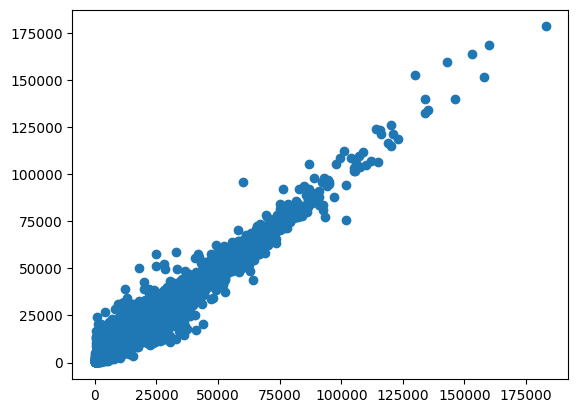

In [ ]:
plt.scatter(y_test,predictions)

# Insights and Summary

In the second part of this notebook we trained 4 types of model for regression with the preprocessed data and found which one might be better.

**1)Linear Regression**: It gave a RMSE(Root Squared Mean Estimation) of 1637.17 which tells that it gave nice prediction even in unseen test data. It also gave quite nice fit line and distribution graph.

**2)Decision Tree**: It gave the worst RMSE value of 2241. It occcured most probably of overfitting.

**3)Random Forest**: It gave RMSE value 1526 which is really good for unseen data.

**4)Neural Network**: It was the best models among these four. It gave the least RMSE value of 1489.8. 5 Dense hidden layers  were used for this neural network.  


So, we can say that Neural Network model was the best chosen model.


# Possible Improvement and Obstacles

1)In data pre-processing the missing values could be handled with **predictive models**  instead of mean and mode.

2) Saledate was dropped for having some defect at index 306447. It could be used to make more columns with day and date and it influnces the selling price.

3) Instead of encoding all the categorical data with label encoder, I should also have used other encoder based on the data.  

3) **Hyperparameter Tuning**: Experimentation with hyperparameters could be used for Decision Tree, Random Forest and neural network to see which parameters like n_estimator, epochs, batch size etc.

4) Change in the layers of neural network can make huge changes in the prediction. So, experimention with different types and size of layers might give better model

# Conclusion

We can say that **Neural Network** model gave the beat result based on Root Squared Mean Estimation. In addition, we can do better data pre-processing to create more optimal dataset.